# OBJECTIVES:

1) To formulate and present the rationale for a hypothesis test that the Par-Inc could use to compare driving distance of Current and New ball.

2) To analyse the data to provide hypothesis testing conclusion.

3) To provide a recommendation for Par Inc.


In [2]:
#importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power

In [3]:
#reading the data
file= pd.read_excel("SM4-Golf.xls")

In [4]:
#duplicating data for safety
data=file.copy()

### to look-up data
data.head()

The attributes signifies the distance travelled by the Current and New ball

In [6]:
#getting complete over view of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current,40.0,270.275,8.752985,255.0,263.0,270.0,275.25,289.0
New,40.0,267.500,9.896904,250.0,262.0,265.0,274.50,289.0


there are totally 40 values each
at present it looks like means are not that apart from each other

In [7]:
#to check for null valuesand to know the datatype of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 680.0 bytes


'''
There is no null data.
The atributes Current and New are the measure of distance.
Hence the contineous datatype integer holds good.
'''


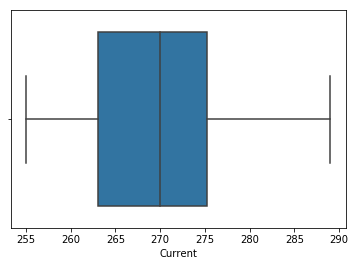

In [20]:
#let us now visualise the data
sns.boxplot(data['Current'])
plt.show()

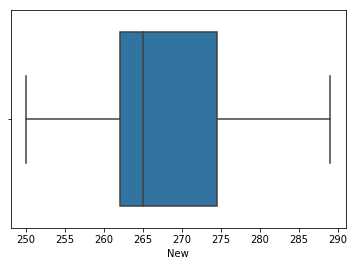

In [21]:
sns.boxplot(data['New'])
plt.show()

'''
From above Visualisation we can clearly see that the data is of normal distribution.
There are no significant outliers.

Now the Hypothesis testing has to be carried out.
    Let us assume, 
                   1) H0:mu1=mu2,
                      (Mean distance travelled by Current ball = Mean distance travelled by New ball)
                      i.e., New coating does not have effect on driving distances.
                    
                   2) Ha:mu1!=mu2,
                      (Mean distance travelled by Current ball != Mean distance travelled by New ball)
                      i.e., New coating does have significant effect on driving distances.
                      
                   3) The level of Significance(alpha)=0.05

'''

'''
The pragmatic test is done on the data which is normally distributed.
The non-pragmatic test can ve  done on all kind of data which is specifically not normal distribution.
even thought we can visualise and check the distribution of variances, the paragmatic and non-pragmatic tests can be done to kno the results statistically.
'''

In [9]:
#Performing parametric ttest on independent 2samples
t_static,p_value=ttest_ind(data['Current'],data['New'])
print(t_static,p_value)

1.3283615935245678 0.18793228491854663


The pvalue above is ~0.188 which is greater than the level of significance.
i.e.,0.188>0.05
This suggests us to accept H0

In [10]:
#Performing non-parametric ttest on independent 2samples
mu,p_value=mannwhitneyu(data['Current'],data['New'])
print(mu,p_value)

668.0 0.10265192122893124


'''
The pvalue above is ~0.10 which is greater than the level of significance.
i.e.,0.10>0.05
This suggests us to accept H0
'''

In [11]:
#to check variance distribution across two different groups
levene(data['Current'],data['New'])

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

C:\Users\SHASHI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


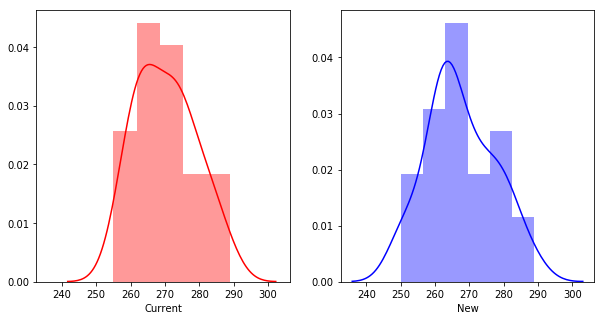

In [12]:
#let us now visualise the data
f,axes=plt.subplots(1,2,figsize=(10,5),sharex=True)
sns.distplot(data['Current'],color="red",ax=axes[0])
sns.distplot(data['New'],color="blue",ax=axes[1])
plt.show()

In [13]:
'''
The pvalue above is ~0.615 which is greater than the level of significance.
i.e.,0.615>0.05
This means that around 61.5% variances are approximate, Hence suggests us not to reject H0.
'''

'\nThe pvalue above is ~0.615 which is greater than the level of significance.\ni.e.,0.615>0.05\nThis means that around 61.5% variances are approximate, Hence suggests us not to reject H0.\n'

In [14]:
#to statistically check whether the data is distributed normally or not
shapiro(data['Current'])

(0.9707046747207642, 0.378787100315094)

The Higher pvalue of ~0.38 suggest us that,statistically the variances are normally distributed.

In [15]:
#to statistically check whether the data is distributed normally or not
shapiro(data['New'])

(0.9678263664245605, 0.3064655661582947)

The Higher pvalue of ~0.38 suggest us that,statistically the variances are normally distributed.

In [16]:
'''
Power of the test can be calculated to know the demarcation between H0 and Ha.
Lower pvalue than the significance value suggests us to retain/accept H0 and vice-versa.
'''

'\nPower of the test can be calculated to know the demarcation between H0 and Ha.\nLower pvalue than the significance value suggests us to retain/accept H0 and vice-versa.\n'

In [17]:
pooledstd=(np.mean(data['Current'])-np.mean(data['New']))/np.sqrt((40-1)*np.var(data['Current'])+(40-1)*np.var(data['New'])/40+40-2)
pooledstd

0.05029362946501662

In [18]:
print(ttest_power(0.05,nobs=40,alpha=0.05,alternative="two-sided"))

0.06097350031712489


The above power of the test indicate that the (1-beta) value is ~0.061 which means to accept H0

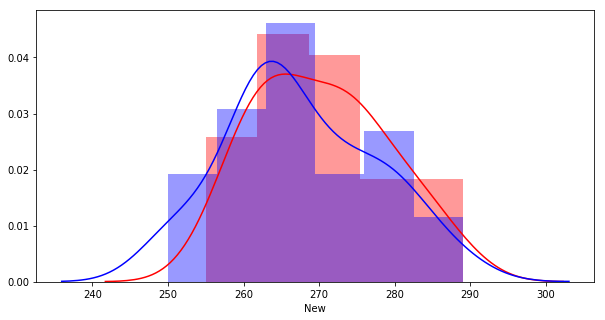

In [22]:
f,axes=plt.subplots(figsize=(10,5),sharex=True)
sns.distplot(data['Current'],color="red")
sns.distplot(data['New'],color="blue")
plt.show()

'''
From above visualisation we can note that there is no significant difference/demarkation between distance travelled by Current and New ball.
Hence Par Inc. can take a note of this while deciding the release of the new cut resistance golf ball to the market 
'''